<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/Anikeev%20Artem/YOLOv8m_seg_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
import cv2
from ultralytics import YOLO

In [ ]:
import os
from IPython.display import Image

from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

directory_path = '/content/drive/MyDrive/stajirovka2'
files = os.listdir(directory_path)
# Выводим имена всех файлов
for file_name in files:
  print(file_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
config.yaml
labels
images
runs
video_for_test
video_for_test_results_yolov8n-seg
video_for_test_results
dataset


In [ ]:
ROOT_DIR = "/content/drive/MyDrive/stajirovka2"

In [ ]:
# Копирование папок
import shutil

# Путь к исходному файлу
source_folder =  '/content/drive/MyDrive/stajirovka2'

# Путь к целевой папке на Google Диске
destination_folder = '/content/Data_segmentation'

# Команда для копирования папки
shutil.copytree(source_folder, destination_folder)

'/content/Data_segmentation'

In [ ]:
import os

folder_path = "/content/Data_segmentation/labels/val" # путь к папке
for filename in os.listdir(folder_path): # перебираем все файлы в папке
    if "_mask" in filename: # если в имени файла есть "_mask"
        new_filename = filename.replace("_mask", "") # удаляем "_mask" из имени файла
        os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename)) # переименовываем файл

In [ ]:
model = YOLO('yolov8m-seg.pt')  # load a pretrained model (recommended for training)
model.train(data='/content/Data_segmentation/config.yaml', epochs=200, imgsz=640)


Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/Data_segmentation/config.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb390c78f70>
fitness: 0.3680929822607215
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([    0.33664])
names: {0: 'bad_area'}
plot: True
results_dict: {'metrics/precision(B)': 0.5432509113333833, 'metrics/recall(B)': 0.32710280373831774, 'metrics/mAP50(B)': 0.3335031497635351, 'metrics/mAP50-95(B)': 0.17283301163134543, 'metrics/precision(M)': 0.5277294567238582, 'metrics/recall(M)': 0.3177570093457944, 'metrics/mAP50(M)': 0.3176750610053276, 'metrics/mAP50-95(M)': 0.16380605635069367, 'fitness': 0.3680929822607215}
save_dir: PosixPath('runs/segment/train3')
seg: ultralytics.utils.metrics.Metric object
speed: {'preprocess': 0.113928

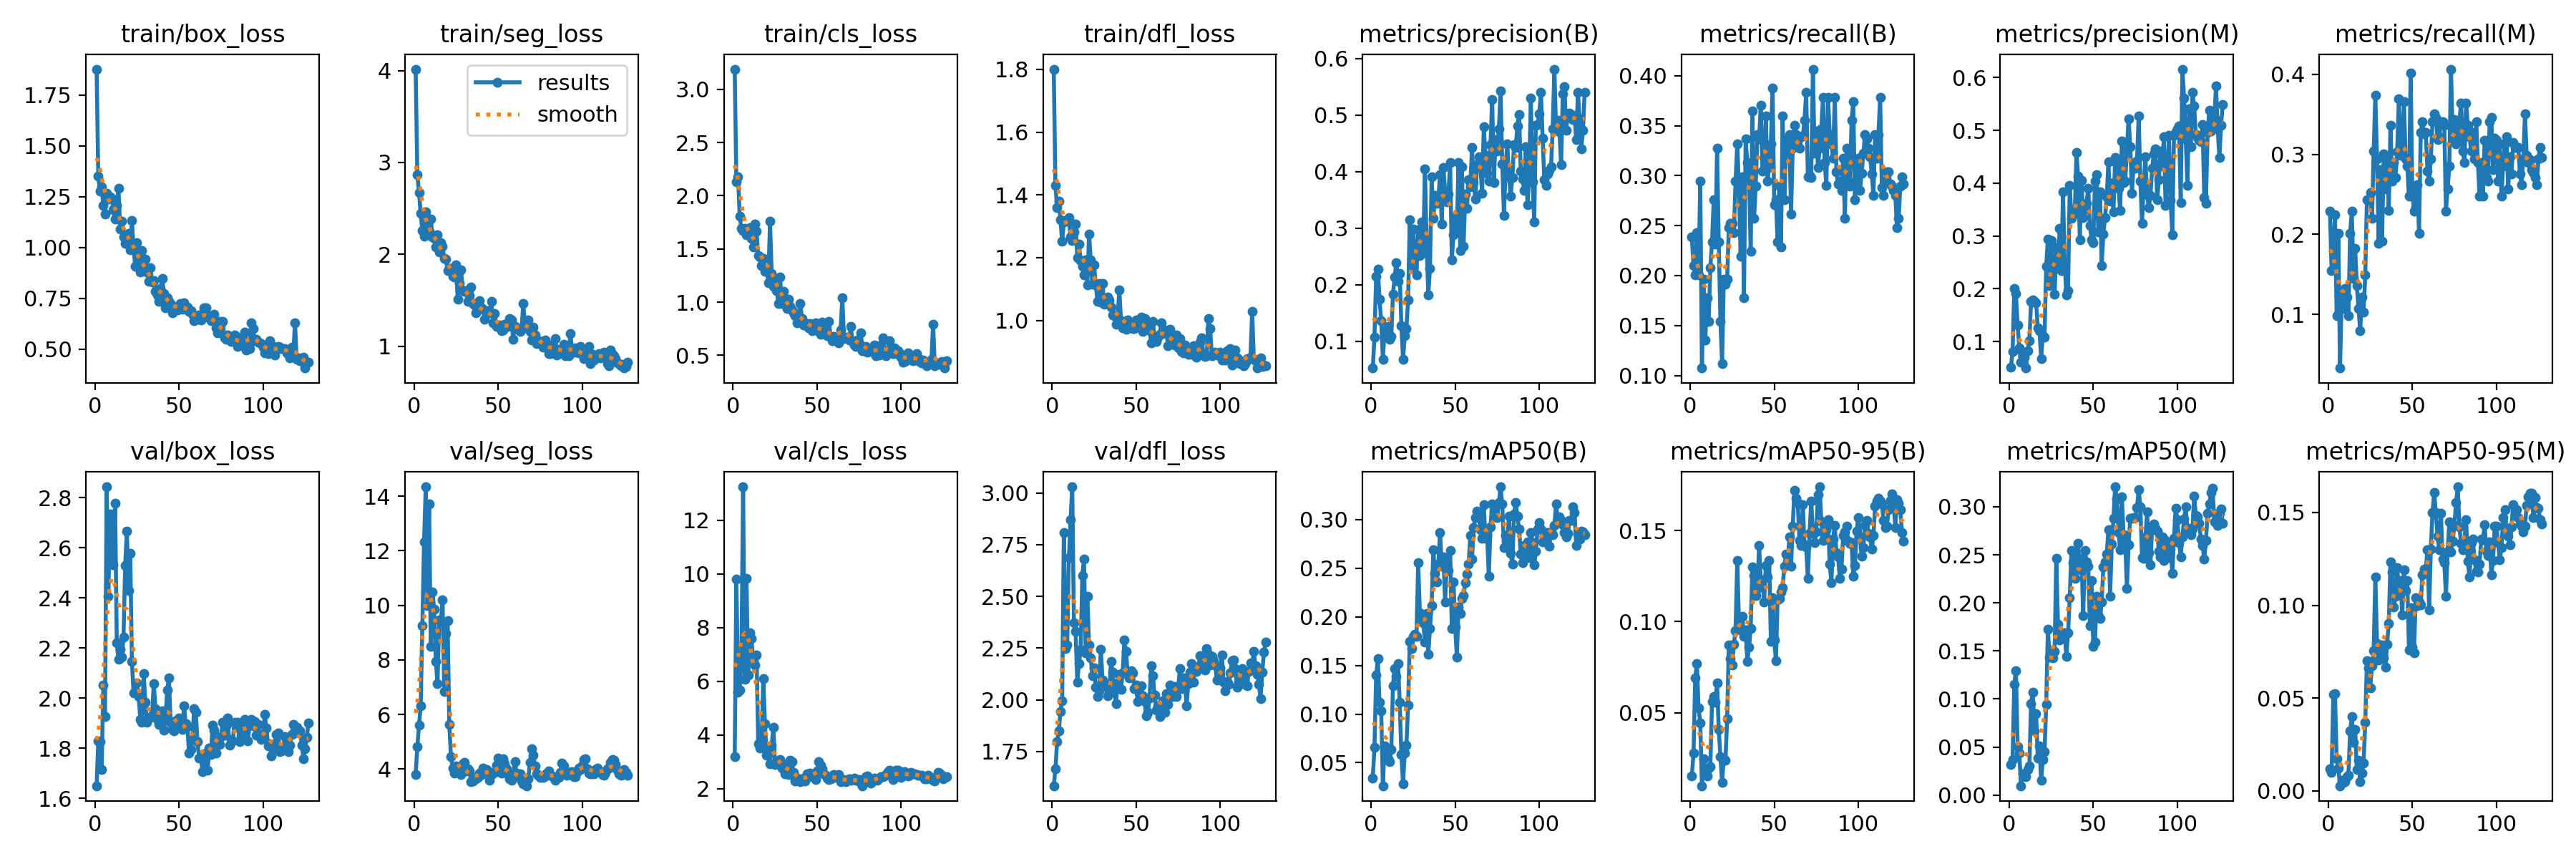

In [ ]:
# Посмотреть итог обучения
from IPython.display import Image
Image(filename='/content/runs/segment/train3/results.png', height=600)

In [ ]:
# Сохранение обученной модели

import shutil

# Путь к исходному файлу
source_folder = '/content/runs/segment/train3'

# Путь к целевой папке на Google Диске
destination_folder = '/content/drive/MyDrive/stajirovka2/runs/segment/train2'

# Копирование файла на Google Диск
#shutil.copytree(source_folder, destination_folder)

# Команда для копирования папки
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/stajirovka2/runs/segment/train2'

In [ ]:
import os

from ultralytics import YOLO
# Восстановление последней модели:

model_path = '/content/drive/MyDrive/stajirovka2/runs/segment/train/weights/last.pt'
model = YOLO(model_path)

In [ ]:
# Предикт на картинке

results = model.predict(source="/content/Data_segmentation/images/val/3.jpg", conf=0.40, save=True, show=True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/Data_segmentation/images/val/3.jpg: 384x640 1 bad_area, 109.1ms
Speed: 2.9ms preprocess, 109.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict


In [ ]:
# Копируем из гуглдиска в коллаб

import shutil

# Путь к исходному файлу
source_folder = '/content/Data_segmentation/video_for_test/5-6-rows.mp4'

# Путь к целевой папке на Google Диске
destination_folder = '/content/sample_data/'

# Копирование файла на Google Диск
#shutil.copy(source_path, target_path)
shutil.copy(source_folder, destination_folder)

In [ ]:
# Вариант Андрея как делать предикт с коллаба

model.predict(source="/content/Data_segmentation/video_for_test/5-6-rows.mp4", save=True, show=False)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/460) /content/Data_segmentation/video_for_test/5-6-rows.mp4: 384x640 10 bad_areas, 36.5ms
video 1/1 (2/460) /content/Data_segmentation/video_for_test/5-6-rows.mp4: 384x640 10 bad_areas, 52.4ms
video 1/1 (3/460) /content/Data_segmentation/video_for_test/5-6-rows.mp4: 384x640 9 bad_areas, 39.7ms
video 1/1 (4/460) /content/Data_segmentation/video_for_test/5-6-rows.mp4: 384x640 10 bad_areas, 35.6ms
video 1/1 (5/460) /content/Data_segmentation/

OutOfMemoryError: ignored

In [ ]:
# Копируем из коллаба в гуглдиск

import shutil

# Путь к исходному файлу
source_folder = '/content/runs/segment/predict4/5-6-rows.avi'

# Путь к целевой папке на Google Диске
destination_folder = '/content/drive/MyDrive/stajirovka2/video_for_test_results/'

# Копирование файла на Google Диск
shutil.copy(source_folder, destination_folder)

'/content/drive/MyDrive/stajirovka2/video_for_test_results/5-6-rows.avi'